In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 
for j in range(300):
    model.step()

There are 0 agents unassigned!!
shock is happening!!
shock is happening!!


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births
0,0.378035,946,0,0,27,42,9
1,0.395989,900,4,18,54,63,15
2,0.386383,862,12,36,90,82,24
3,0.394284,854,14,40,107,102,32
4,0.394562,838,18,51,126,124,41
5,0.396820,852,18,51,144,131,50
6,0.397013,873,20,55,175,140,68
7,0.399074,881,24,66,199,149,77
8,0.397646,888,27,76,219,161,86
9,0.399817,905,29,79,242,164,91


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income
Step AgentID                                                               
12   1002          Annual crops         small  1.050000e+07             NaN
     1003     Other agriculture         small  9.740951e+06             NaN
     1004          Annual crops         small  1.050000e+07             NaN
     1005          Annual crops         small  7.672491e+06             NaN
     1006          Annual crops         small  1.050000e+07             NaN
...                         ...           ...           ...             ...
300  1296                  None          None  1.060044e+09             1.0
     1297                  None          None  1.788445e+09             1.0
     1299                  None          None  1.010069e+10             0.0
     1301                  None          None  5.113046e+09             0.0
     1303                  None          None  1.957075e+09             1.0

[6352 rows x 4 columns]

In [5]:
agent_landless = agent_data[agent_data['too low income'].notna()]

agent_landless = agent_landless[agent_landless['too low income']==1]
agent_landless = agent_landless.reset_index()
agent_landless['Year'] = agent_landless['Step']//12

agent_landless = agent_landless.groupby('Year').size().reset_index(name="Too low income count")
agent_landless

,Year,Too low income count
0,1,23
1,2,29
2,3,31
3,4,34
4,5,34
5,6,35
6,7,35
7,8,36
8,9,39
9,10,40


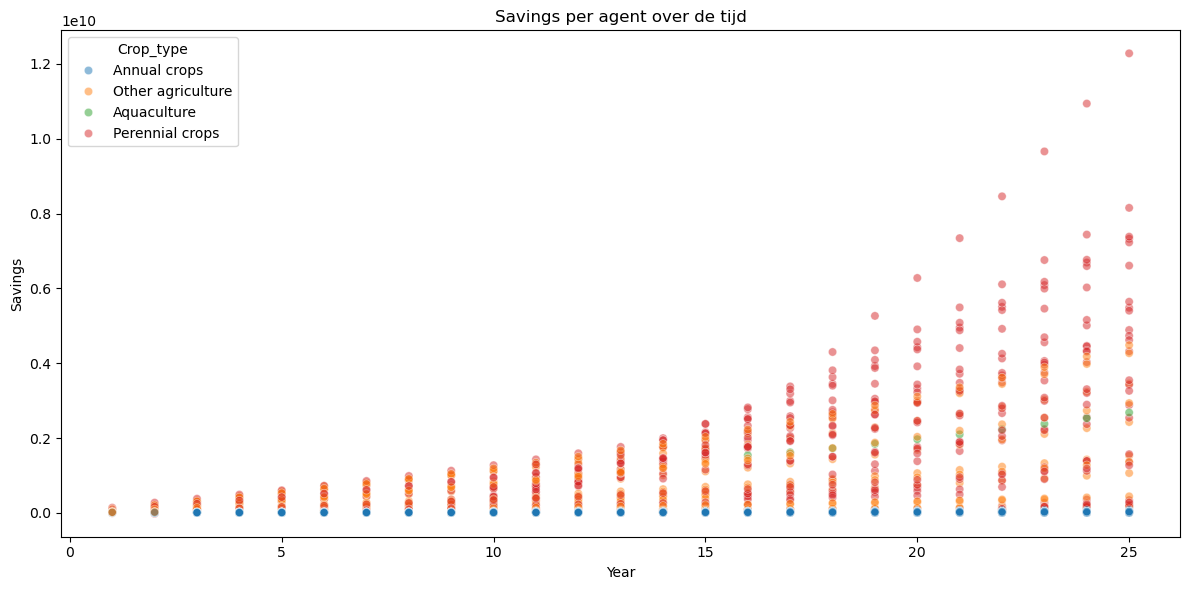

In [6]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]
agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings = agent_savings.reset_index()  # zodat 'Step' en 'AgentID' weer kolommen zijn
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over de tijd")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

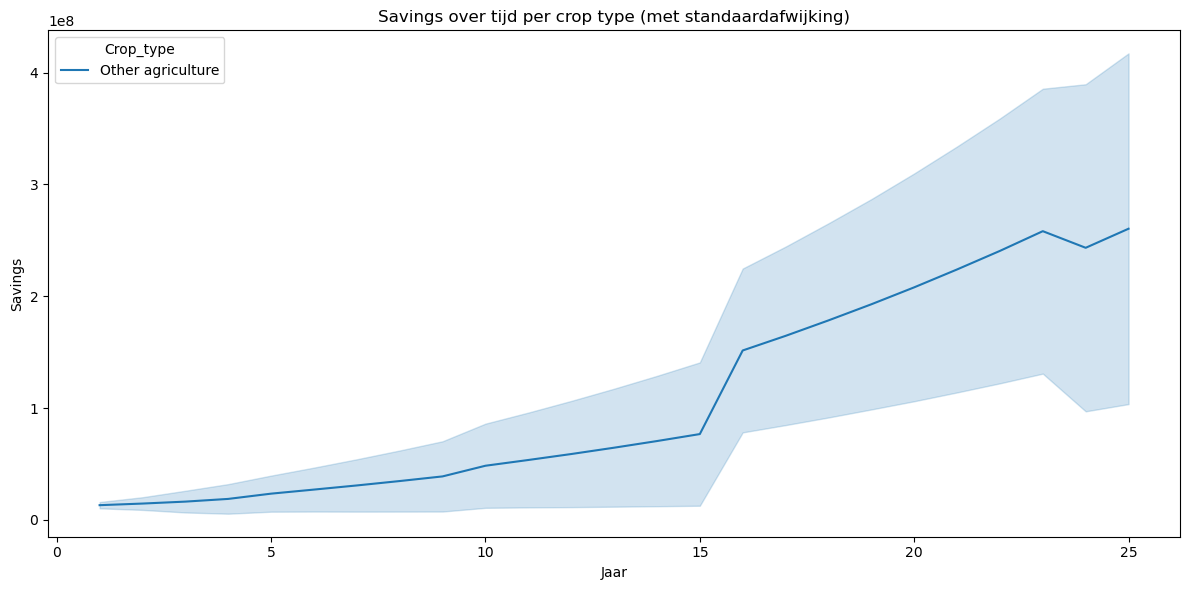

In [7]:
agent_savings = agent_data[agent_data['Savings'].notna()]

agent_savings = agent_savings.reset_index()
agent_savings['Year'] = agent_savings['Step'] / 12

agent_savings = agent_savings[agent_savings['Crop_type']=="Other agriculture"]
agent_savings = agent_savings[agent_savings['Land_category']=="small"]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=agent_savings,
    x='Year',
    y='Savings',
    hue='Crop_type',
    estimator='mean',
    errorbar='sd'
)
plt.title("Savings over tijd per crop type (met standaardafwijking)")
plt.xlabel("Jaar")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()


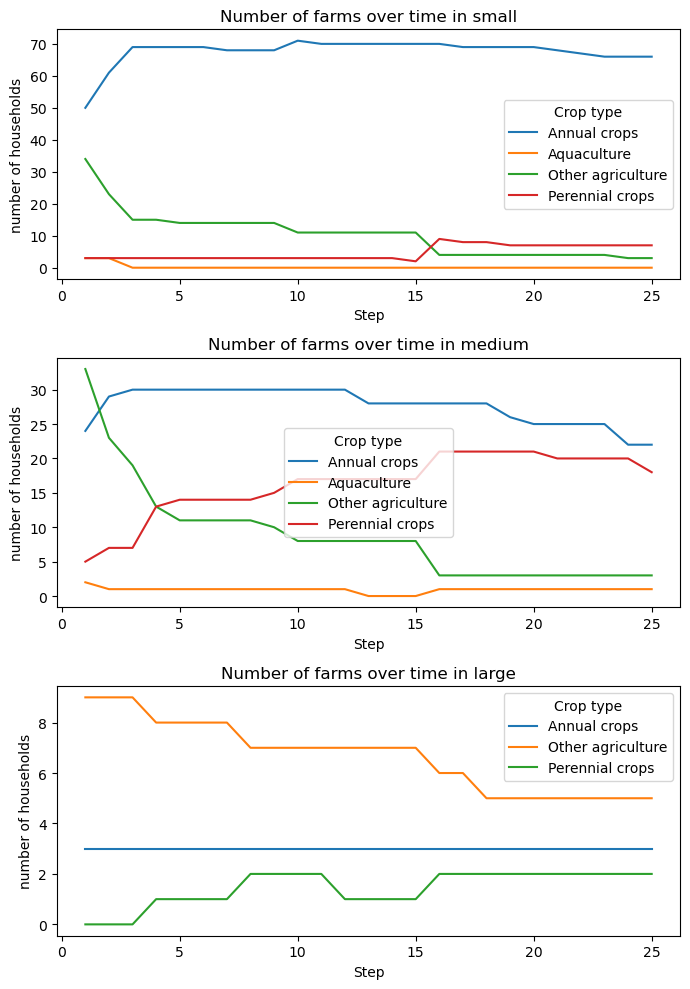

In [8]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

fig, axes = plt.subplots(nrows = 3, ncols= 1, figsize = (7,10))

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"]==category]
    subsets = subsets.reset_index()
    subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name = "count")
    subsets = subsets.pivot(index = "Step", columns = "Crop_type", values = "count").fillna(0)
    subsets.index = subsets.index / 12
    subsets.plot(ax=axes[i])
    axes[i].set_title(f"Number of farms over time in {category}")
    axes[i].set_ylabel("number of households")
    axes[i].legend(title = "Crop type")
    
plt.xlabel("Step")
plt.tight_layout()
plt.show()

# agent_data_crops_per_land = agent_data_crops_per_land.reset_index().groupby(['Step', "Crop_type", "Land_category"]).size().reset_index(name = "count")
# agent_data_crops_per_land.plot(kind="line", figsize = (10,6))
#
# plt.title("Crop type distribution over time")
# 

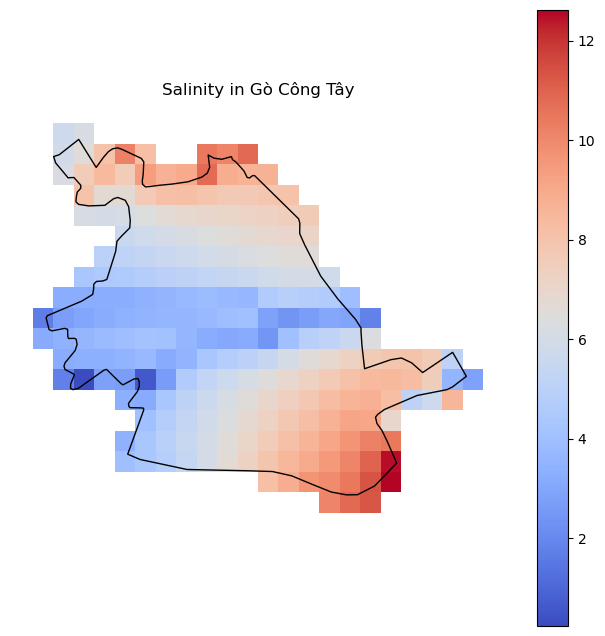

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

168
130


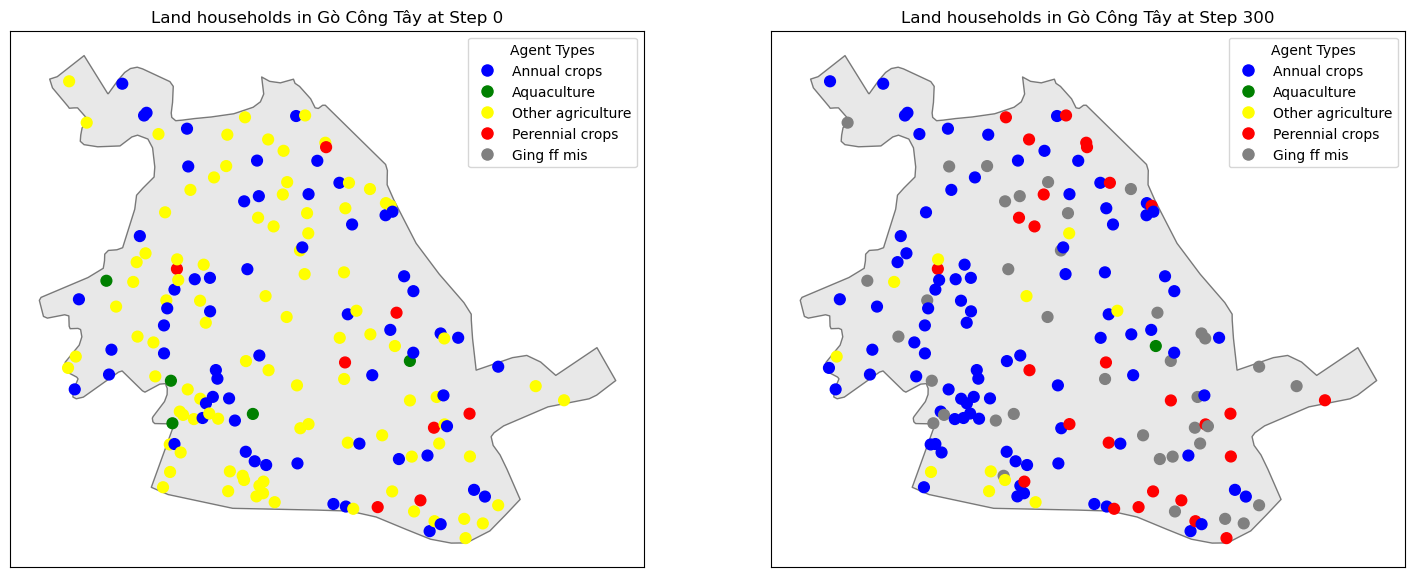

In [10]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households

def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')
    

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    print(len(node_to_agent))
    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('green')
            elif agent.crop_type == "Other agriculture":
                colors_to_draw.append('yellow')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Other agriculture')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Ging ff mis')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
